<img src="https://media.npr.org/assets/img/2020/09/18/gettyimages-1170941183-c1e33a9a2b274d5381f14d18f71db5ee0342aec3-s800-c85.jpg" width="500" height="360" />

# Book Recommendation

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Loading Data](#section2)<br>
3. [Understanding and meging data](#section3)<br>
4. [Data Analysis and Visualization](#section4)<br>
5. [Data Preprocessing](#section5)<br>
6. [Model Fitting with K Nearest Neighbors](#section6)<br>
7. [Recommendations](#section7)<br>

# **Problem Statement**

- The aim of this project is to recommend books to users based on their ratings to other books.
- There are three datasts:
  
  *   Books - Book information: ISBN number, book title, author, year of pubication and publisher.
  *   Book-Ratings - User ID, ISBN number and book ratings
  *   Users - User ID, location and age




- Data Source: https://thecleverprogrammer.com/2020/05/23/book-recommendation-system-with-machine-learning/#google_vignette


# **Loading Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
book = pd.read_csv("https://raw.githubusercontent.com/kaushalneha30/MyProject/master/BX-Books.csv", sep=";", error_bad_lines=False, encoding="latin-1") 
#this is a ; separated file, encoding is added to read latin characters and error_bad_lines to drop rows with extra columns
book.columns = ['ISBN','bookTitle','bookAuthor','yearOfPublication','publisher','imageURLs','imageURLm','imageURLl']
book.head()

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageURLs,imageURLm,imageURLl
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
#Dropping unnecessery columns
book1 = book.drop(columns=['yearOfPublication','imageURLs','imageURLm','imageURLl'])
book1.head()

,ISBN,bookTitle,bookAuthor,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,W. W. Norton &amp; Company


In [ ]:
book1.shape

(271360, 4)

In [ ]:
book1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   ISBN        271360 non-null  object
 1   bookTitle   271360 non-null  object
 2   bookAuthor  271359 non-null  object
 3   publisher   271358 non-null  object
dtypes: object(4)
memory usage: 8.3+ MB


- No null values observed

In [ ]:
ratings = pd.read_csv("https://raw.githubusercontent.com/kaushalneha30/MyProject/master/BX-Book-Ratings.csv",sep=";",error_bad_lines=False, encoding="latin-1")
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
ratings.shape

(1149780, 3)

In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [ ]:
users = pd.read_csv('https://raw.githubusercontent.com/kaushalneha30/MyProject/master/BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']
users.head()

,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
users.shape

(278858, 3)

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   userID    278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


# **Understanding and merging data**

In [ ]:
merged_data = book1.merge(ratings, left_on = 'ISBN', right_on = 'ISBN', how = 'left')
merged_data.head()

,ISBN,bookTitle,bookAuthor,publisher,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,Oxford University Press,2.0,0.0
1,0002005018,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,8.0,5.0
2,0002005018,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,11400.0,0.0
3,0002005018,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,11676.0,8.0
4,0002005018,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,41385.0,0.0


In [ ]:
merged_data.shape

(1032345, 6)

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1032345 entries, 0 to 1032344
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   ISBN         1032345 non-null  object 
 1   bookTitle    1032345 non-null  object 
 2   bookAuthor   1032344 non-null  object 
 3   publisher    1032343 non-null  object 
 4   User-ID      1031136 non-null  float64
 5   Book-Rating  1031136 non-null  float64
dtypes: float64(2), object(4)
memory usage: 55.1+ MB


In [ ]:
final_data = merged_data.merge(users, left_on = 'User-ID', right_on = 'userID', how = 'left')
final_data.head()

,ISBN,bookTitle,bookAuthor,publisher,User-ID,Book-Rating,userID,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,Oxford University Press,2.0,0.0,2.0,"stockton, california, usa",18.0
1,0002005018,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,8.0,5.0,8.0,"timmins, ontario, canada",NaN
2,0002005018,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,11400.0,0.0,11400.0,"ottawa, ontario, canada",49.0
3,0002005018,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,11676.0,8.0,11676.0,"n/a, n/a, n/a",NaN
4,0002005018,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,41385.0,0.0,41385.0,"sudbury, ontario, canada",NaN


In [ ]:

final_data = final_data[['User-ID','Location','Age','bookTitle','bookAuthor','publisher','ISBN','Book-Rating']]
final_data.head()

,User-ID,Location,Age,bookTitle,bookAuthor,publisher,ISBN,Book-Rating
0,2.0,"stockton, california, usa",18.0,Classical Mythology,Mark P. O. Morford,Oxford University Press,0195153448,0.0
1,8.0,"timmins, ontario, canada",NaN,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,0002005018,5.0
2,11400.0,"ottawa, ontario, canada",49.0,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,0002005018,0.0
3,11676.0,"n/a, n/a, n/a",NaN,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,0002005018,8.0
4,41385.0,"sudbury, ontario, canada",NaN,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,0002005018,0.0


In [ ]:
final_data.shape

(1032345, 8)

In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1032345 entries, 0 to 1032344
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   User-ID      1031136 non-null  float64
 1   Location     1031136 non-null  object 
 2   Age          753301 non-null   float64
 3   bookTitle    1032345 non-null  object 
 4   bookAuthor   1032344 non-null  object 
 5   publisher    1032343 non-null  object 
 6   ISBN         1032345 non-null  object 
 7   Book-Rating  1031136 non-null  float64
dtypes: float64(3), object(5)
memory usage: 70.9+ MB


- Age column has null values.

# **Data Analysis and Visualization**

In [ ]:
import seaborn as sns

### **Maximum users belongs to which location?**

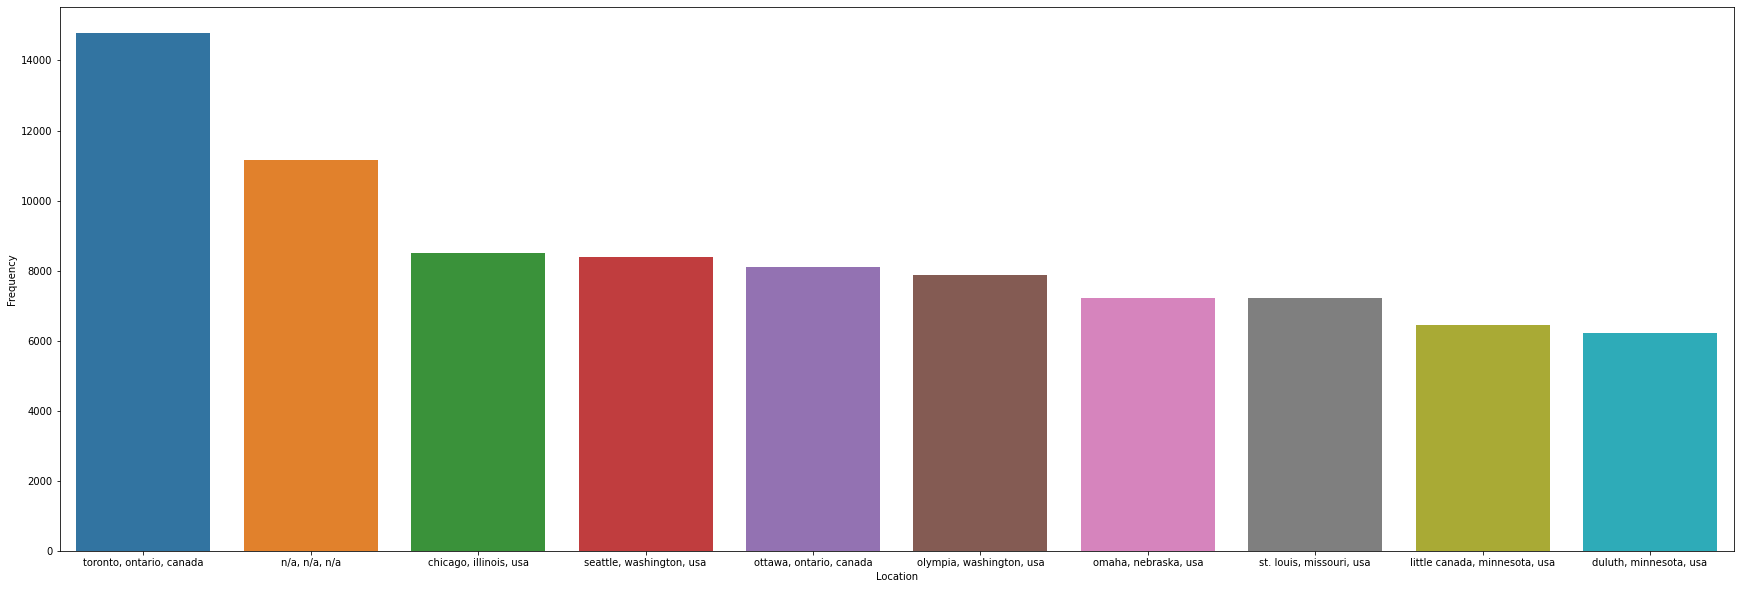

In [ ]:
plt.figure(figsize=(30,10))
sns.countplot('Location',data = final_data, order = final_data['Location'].value_counts()[:10].index)
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.show()

Maximum users belong to **Toronto, Ontario, Canada**

### **Which age group is most active in reading and providing ratings?**

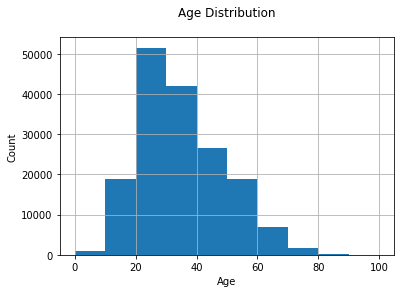

In [ ]:
users.Age.hist(bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Age group- **20-30** is most active.

### **Which book is read most by the users?**

Text(0, 0.5, 'Users')

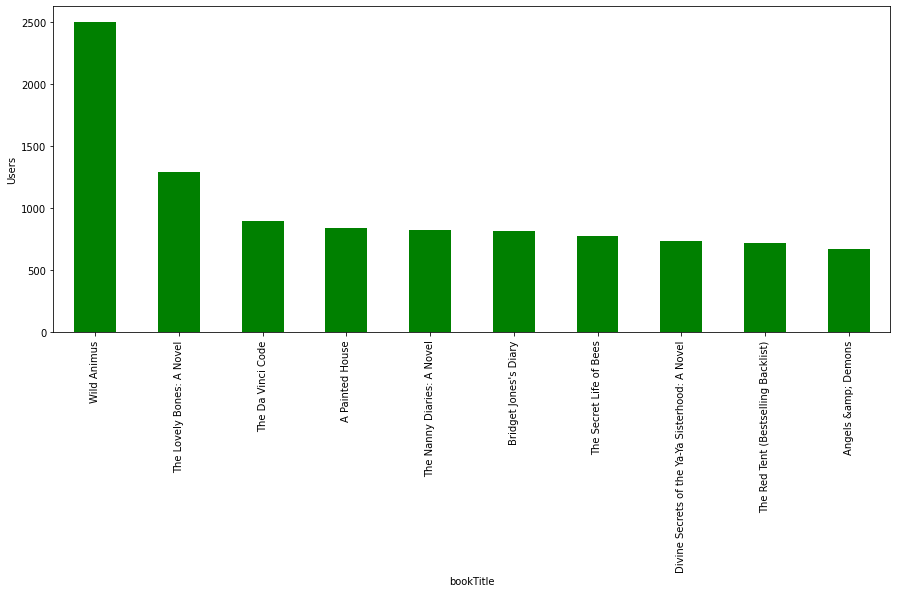

In [ ]:
plt.figure(figsize = (15, 6))
final_data.groupby('bookTitle')['User-ID'].count().sort_values(ascending=False)[0:10].plot(kind='bar', color='g')
plt.ylabel('Users')

**Wild Animus** is read most by the users.

### **As 7 out of top 10 places where users read and rate books belong to USA, data has been filtered on USA location.**

In [ ]:
#Filter USA data
usa_user_rating = final_data[final_data['Location'].str.contains("usa", na=False)]
usa_user_rating.head()

,User-ID,Location,Age,bookTitle,bookAuthor,publisher,ISBN,Book-Rating
0,2.0,"stockton, california, usa",18.0,Classical Mythology,Mark P. O. Morford,Oxford University Press,0195153448,0.0
16,2954.0,"wichita, kansas, usa",71.0,Decision in Normandy,Carlo D'Este,HarperPerennial,0060973129,8.0
19,35704.0,"kansas city, missouri, usa",53.0,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,Farrar Straus Giroux,0374157065,6.0
20,83160.0,"oregon city, oregon, usa",65.0,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,Farrar Straus Giroux,0374157065,0.0
21,110912.0,"milpitas, california, usa",36.0,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,Farrar Straus Giroux,0374157065,10.0


In [ ]:
usa_user_rating.shape

(746597, 8)

In [ ]:
usa_user_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 746597 entries, 0 to 1032344
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   User-ID      746597 non-null  float64
 1   Location     746597 non-null  object 
 2   Age          553905 non-null  float64
 3   bookTitle    746597 non-null  object 
 4   bookAuthor   746597 non-null  object 
 5   publisher    746595 non-null  object 
 6   ISBN         746597 non-null  object 
 7   Book-Rating  746597 non-null  float64
dtypes: float64(3), object(5)
memory usage: 51.3+ MB


# **Data Preprocessing**

In [ ]:
usa_user_rating['Age'].fillna((usa_user_rating['Age'].mean()), inplace=True)
usa_user_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 746597 entries, 0 to 1032344
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   User-ID      746597 non-null  float64
 1   Location     746597 non-null  object 
 2   Age          746597 non-null  float64
 3   bookTitle    746597 non-null  object 
 4   bookAuthor   746597 non-null  object 
 5   publisher    746595 non-null  object 
 6   ISBN         746597 non-null  object 
 7   Book-Rating  746597 non-null  float64
dtypes: float64(3), object(5)
memory usage: 51.3+ MB


- Filled missing values in Age with mean age.

In [ ]:
df1 = usa_user_rating[usa_user_rating.isna().any(axis=1)]
df1.head()

,User-ID,Location,Age,bookTitle,bookAuthor,publisher,ISBN,Book-Rating
824289,98391.0,"morrow, georgia, usa",52.0,Tyrant Moon,Elaine Corvidae,NaN,193169656X,9.0
824598,98391.0,"morrow, georgia, usa",52.0,Finders Keepers,Linnea Sinclair,NaN,1931696993,9.0


In [ ]:
usa_user_rating.at[824289,'publisher'] ='Mundania Press LLC'
usa_user_rating.at[824598,'publisher'] ='Hodder &amp; Stoughton General Division'

- Filled missing values in publisher column manually after searching.

In [ ]:
usa_user_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 746597 entries, 0 to 1032344
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   User-ID      746597 non-null  float64
 1   Location     746597 non-null  object 
 2   Age          746597 non-null  float64
 3   bookTitle    746597 non-null  object 
 4   bookAuthor   746597 non-null  object 
 5   publisher    746597 non-null  object 
 6   ISBN         746597 non-null  object 
 7   Book-Rating  746597 non-null  float64
dtypes: float64(3), object(5)
memory usage: 71.3+ MB


### **Grouping by book titles and creating a new column for total rating count**

In [ ]:
book_ratingCount = (usa_user_rating.groupby(by = ['bookTitle'])['Book-Rating'].count().reset_index().rename(columns = {'Book-Rating': 'totalRatingCount'})[['bookTitle', 'totalRatingCount']])
book_ratingCount.head()

,bookTitle,totalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


### **Merging total rating count with usa filtered data**

In [ ]:
rating_with_totalRatingCount = usa_user_rating.merge(book_ratingCount, left_on = 'bookTitle', right_on = 'bookTitle', how = 'left')
rating_with_totalRatingCount.head()

,User-ID,Location,Age,bookTitle,bookAuthor,publisher,ISBN,Book-Rating,totalRatingCount
0,2.0,"stockton, california, usa",18.0,Classical Mythology,Mark P. O. Morford,Oxford University Press,0195153448,0.0,1
1,2954.0,"wichita, kansas, usa",71.0,Decision in Normandy,Carlo D'Este,HarperPerennial,0060973129,8.0,1
2,35704.0,"kansas city, missouri, usa",53.0,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,Farrar Straus Giroux,0374157065,6.0,9
3,83160.0,"oregon city, oregon, usa",65.0,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,Farrar Straus Giroux,0374157065,0.0,9
4,110912.0,"milpitas, california, usa",36.0,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,Farrar Straus Giroux,0374157065,10.0,9


### **Converting the ratings to float**

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
book_ratingCount['totalRatingCount'].describe()

count   179407.000
mean         4.161
std         14.696
min          1.000
25%          1.000
50%          1.000
75%          3.000
max       1201.000
Name: totalRatingCount, dtype: float64

### **Filtering in Popular books only**

In [ ]:
book_ratingCount['totalRatingCount'].quantile(np.arange(.8, 1, .01))

0.800    4.000
0.810    4.000
0.820    4.000
0.830    4.000
0.840    4.000
0.850    5.000
0.860    5.000
0.870    5.000
0.880    6.000
0.890    6.000
0.900    7.000
0.910    8.000
0.920    9.000
0.930   10.000
0.940   11.000
0.950   13.000
0.960   16.000
0.970   20.000
0.980   28.000
0.990   49.000
Name: totalRatingCount, dtype: float64

In [ ]:
popularity_threshold = 50
rating_popular_book = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_book.head()

,User-ID,Location,Age,bookTitle,bookAuthor,publisher,ISBN,Book-Rating,totalRatingCount
11,29526.000,"knoxville, tennessee, usa",26.000,The Kitchen God's Wife,Amy Tan,Putnam Pub Group,0399135782,9.000,216
12,36836.000,"raleigh, north carolina, usa",56.000,The Kitchen God's Wife,Amy Tan,Putnam Pub Group,0399135782,0.000,216
13,46398.000,"san antonio, texas, usa",37.000,The Kitchen God's Wife,Amy Tan,Putnam Pub Group,0399135782,9.000,216
14,49300.000,"loveland, colorado, usa",38.341,The Kitchen God's Wife,Amy Tan,Putnam Pub Group,0399135782,0.000,216
15,49635.000,"seattle, washington, usa",38.341,The Kitchen God's Wife,Amy Tan,Putnam Pub Group,0399135782,9.000,216


In [ ]:
rating_popular_book.shape

(198406, 9)

### **Converting dataset to 2D matrix and filling missing value with zero**

In [ ]:
from scipy.sparse import csr_matrix
rating_popular_book = rating_popular_book.drop_duplicates(['User-ID', 'bookTitle'])
rating_popular_book_pivot = rating_popular_book.pivot(index = 'bookTitle', columns = 'User-ID', values = 'Book-Rating').fillna(0)
rating_popular_book_pivot


User-ID,9.000,14.000,16.000,17.000,23.000,26.000,32.000,39.000,42.000,44.000,51.000,56.000,67.000,75.000,95.000,97.000,99.000,114.000,125.000,132.000,135.000,144.000,165.000,169.000,178.000,185.000,199.000,207.000,224.000,226.000,228.000,230.000,243.000,244.000,254.000,256.000,272.000,280.000,300.000,332.000,...,278535.000,278536.000,278537.000,278542.000,278543.000,278545.000,278550.000,278552.000,278561.000,278582.000,278586.000,278601.000,278633.000,278645.000,278648.000,278653.000,278663.000,278683.000,278694.000,278723.000,278740.000,278769.000,278771.000,278773.000,278781.000,278796.000,278798.000,278800.000,278807.000,278813.000,278819.000,278820.000,278824.000,278828.000,278832.000,278836.000,278843.000,278844.000,278851.000,278854.000
bookTitle,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10 Lb. Penalty,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
16 Lighthouse Road,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1984,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,9.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1st to Die: A Novel,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,10.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2010: Odyssey Two,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0

In [ ]:
rating_popular_book_matrix = csr_matrix(rating_popular_book_pivot.values)
rating_popular_book_matrix

<1788x32982 sparse matrix of type '<class 'numpy.float64'>'
	with 77229 stored elements in Compressed Sparse Row format>

# **Model fitting with K Nearest Neighbors**

In [ ]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(rating_popular_book_matrix)
model_knn

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

# **Recommendations by calculating distance between rating vectors**

### **Selecting a random index number (of random book title)**

In [ ]:
query_index = np.random.choice(rating_popular_book_pivot.shape[0])
query_index

621

In [ ]:
rating_popular_book_pivot.iloc[query_index,:].values.reshape(1,-1) # to convert array rows to array columns

array([[0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
distances, indices = model_knn.kneighbors(rating_popular_book_pivot.iloc[query_index,:].values.reshape(1,-1), n_neighbors = 6)
rating_popular_book_pivot.index[query_index]

'How to Make an American Quilt'

### **Top 5 recommended books**

In [ ]:
for i in range(0, len(distances.flatten())): # flatten to convert ndarray to 1-D array
    if i == 0:
        print('Recommendations for {0}:\n'.format(rating_popular_book_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, rating_popular_book_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for How to Make an American Quilt:

1: M Is for Malice (Kinsey Millhone Mysteries (Hardcover)), with distance of 0.8570979163900768:
2: Standing in the Rainbow : A Novel, with distance of 0.8670507455205654:
3: Deception on His Mind, with distance of 0.8920431740972679:
4: Slammerkin, with distance of 0.8947840908118184:
5: B Is for Burglar (Kinsey Millhone Mysteries (Paperback)), with distance of 0.8979304466748707:
